# CNN animals-10 Classifier

In [1]:
#Folder Structure
import os
print(os.listdir("../"))
print(os.listdir("../input/"))
print(os.listdir("../input/animals/"))
print(os.listdir("../input/animals/raw-img"))

['working', 'lib', 'input', 'src']
['animals']
['raw-img']
['farfalla', 'pecora', 'gallina', 'ragno', 'mucca', 'gatto', 'elefante', 'cavallo', 'cane', 'scoiattolo']


---

In [2]:
#Config
bs = 80
ep = 50
dim1 = dim2 = 256

---

# Building the Neural Network

In [3]:
#importing files for CNN
import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


In [4]:
#model init
model = Sequential()

#conv layer
model.add(Convolution2D(64, (3, 3), activation='relu', input_shape=(dim1,dim2,3)))

#pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

#additional pairs
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#flat layer
model.add(Flatten())

In [5]:
#ann connection

#hidden layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.4))
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.2))

#output layer
model.add(Dense(units=10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 128)       147584    
__________

In [6]:
#brigning all of it together
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

---

# Image Preprocessing & Model Fitting

In [7]:
#import
from keras.preprocessing.image import ImageDataGenerator

In [8]:
image_data_generator = ImageDataGenerator(
    validation_split=0.2,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

In [9]:
train_generator = image_data_generator.flow_from_directory(
    '../input/animals/raw-img',
    target_size = (dim1, dim2),
    batch_size = bs,
    subset="training"
)

validation_generator = image_data_generator.flow_from_directory(
    '../input/animals/raw-img',
    target_size = (dim1, dim2),
    batch_size = bs,
    subset="validation"
)

Found 22618 images belonging to 10 classes.
Found 5648 images belonging to 10 classes.


In [10]:
#Indices
'''
cane  -   Dog
cavallo  -  Horse
elefante  -  Elephant
farfalla  -  Butterfly
gallina  -  Hen
gatto  -  Cat
mucca  -  Cow
pecora  -  Sheep
ragno  -  Spider
scoiattolo  -  Squirrel
'''

train_generator.class_indices

{'cane': 0,
 'cavallo': 1,
 'elefante': 2,
 'farfalla': 3,
 'gallina': 4,
 'gatto': 5,
 'mucca': 6,
 'pecora': 7,
 'ragno': 8,
 'scoiattolo': 9}

In [11]:
history = model.fit_generator(
                    train_generator,
                    steps_per_epoch = (22618 / bs),
                    epochs = ep,
                    validation_data = validation_generator,
                    validation_steps = (5648/bs))

Epoch 1/50
283/282 [==============================] - 508s 2s/step - loss: 2.0298 - acc: 0.2747 - val_loss: 1.6915 - val_acc: 0.3970
Epoch 2/50
283/282 [==============================] - 442s 2s/step - loss: 1.5801 - acc: 0.4583 - val_loss: 1.3438 - val_acc: 0.5409
Epoch 3/50
283/282 [==============================] - 439s 2s/step - loss: 1.3610 - acc: 0.5385 - val_loss: 1.1298 - val_acc: 0.6209
Epoch 4/50
283/282 [==============================] - 438s 2s/step - loss: 1.2229 - acc: 0.5892 - val_loss: 1.0781 - val_acc: 0.6383
Epoch 5/50
283/282 [==============================] - 441s 2s/step - loss: 1.1191 - acc: 0.6282 - val_loss: 0.9581 - val_acc: 0.6829
Epoch 6/50
283/282 [==============================] - 446s 2s/step - loss: 1.0395 - acc: 0.6580 - val_loss: 0.9308 - val_acc: 0.6877
Epoch 7/50
283/282 [==============================] - 447s 2s/step - loss: 0.9758 - acc: 0.6761 - val_loss: 0.9144 - val_acc: 0.6953
Epoch 8/50
283/282 [==============================] - 450s 2s/step - 

---

# Visualize

In [12]:
#Visualize
import matplotlib.pyplot as plt
#Graphing our training and validation
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

<Figure size 432x288 with 0 Axes>

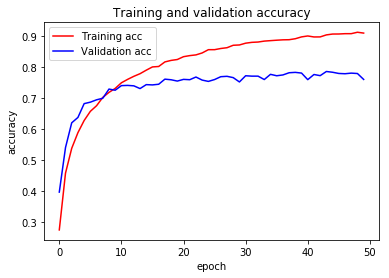

<Figure size 432x288 with 0 Axes>

In [13]:
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='blue', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure()

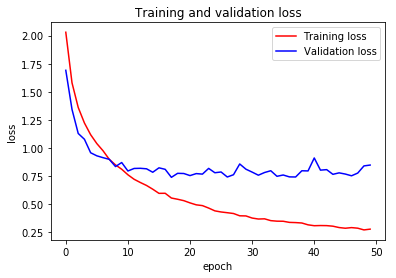

In [14]:
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='blue', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend()
plt.show()

---

# Saving The Model

In [15]:
#Entire Model
model.save('entire_model.h5')

In [16]:
#Model Architecture & Weights
from keras.models import model_from_json

# model architecture to JSON
with open("model_architecture.json", "w") as f:
    f.write(model.to_json())
    
# model weights to HDF5
model.save_weights("model_weights.h5")
print("Saved model to disk")

Saved model to disk


In [17]:
#end-of-code